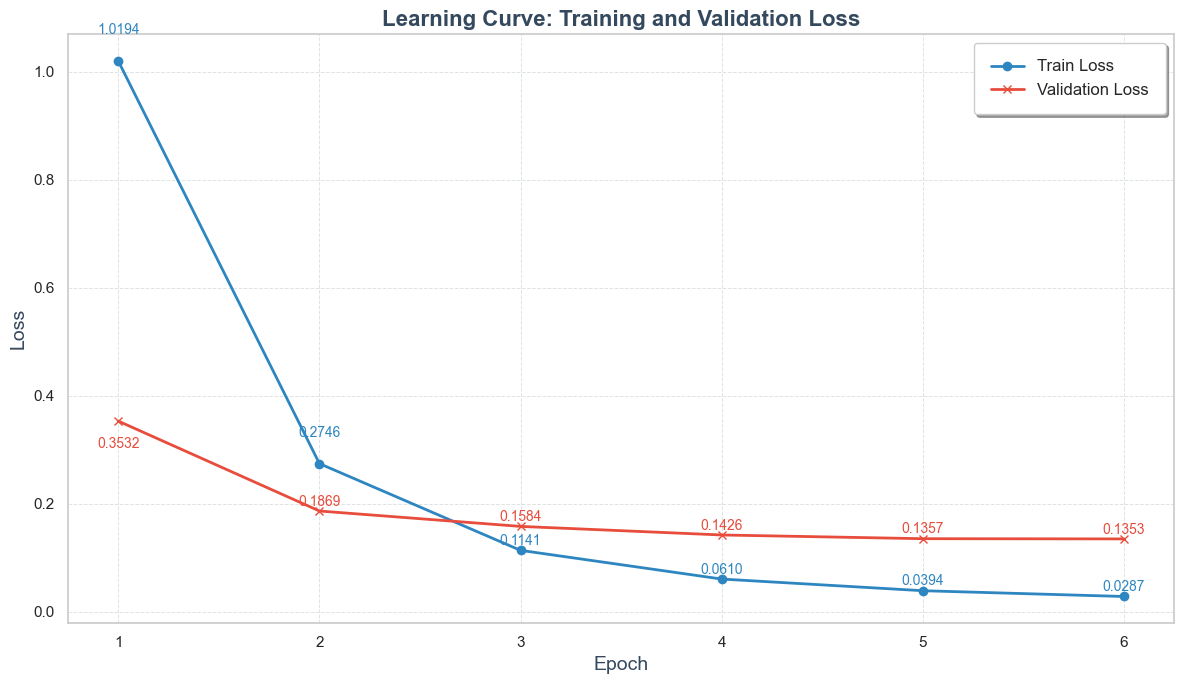

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load trainer_state.json
with open('./embedding/checkpoint-276/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

log_history = trainer_state['log_history']

# Tách loss theo train / val
train_epochs, train_loss_values = [], []
val_epochs, val_loss_values = [], []

for log in log_history:
    if 'loss' in log and 'epoch' in log:
        train_epochs.append(log['epoch'])
        train_loss_values.append(log['loss'])
    if 'eval_loss' in log and 'epoch' in log:
        val_epochs.append(log['epoch'])
        val_loss_values.append(log['eval_loss'])

# Style đẹp
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Vẽ loss
plt.plot(train_epochs, train_loss_values, label='Train Loss', marker='o', color='#2E86C1', linewidth=2)
plt.plot(val_epochs, val_loss_values, label='Validation Loss', marker='x', color='#E74C3C', linewidth=2)

# Ghi nhãn động theo vị trí loss
for i in range(len(train_epochs)):
    y = train_loss_values[i]
    offset = 0.05 if y > 0.2 else 0.01  # adaptive offset
    plt.text(train_epochs[i], y + offset, f'{y:.4f}', fontsize=10, color='#2E86C1', ha='center')

for i in range(len(val_epochs)):
    y = val_loss_values[i]
    offset = 0.05 if y > 0.2 else -0.01
    plt.text(val_epochs[i], y - offset, f'{y:.4f}', fontsize=10, color='#E74C3C', ha='center')

# Cấu hình biểu đồ
plt.title('Learning Curve: Training and Validation Loss', fontsize=16, fontweight='bold', color='#34495E')
plt.xlabel('Epoch', fontsize=14, color='#34495E')
plt.ylabel('Loss', fontsize=14, color='#34495E')
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True, borderpad=1)
plt.grid(color='#D5DBDB', linestyle='--', linewidth=0.7, alpha=0.8)

plt.tight_layout()
plt.show()


# Bảng kết quả

| Thông số                       | Giá trị                   |
|---------------------------------|---------------------------|
| **Bước huấn luyện (Step)**      | 21                        |
| **Mẫu mỗi giây (test/samples_per_second)** | 56.728                   |
| **Mất mát huấn luyện (train/loss)**   | 0.0111                    |
| **Bước mỗi giây (test/steps_per_second)** | 0.897                   |
| **Thời gian đánh giá (eval/runtime)** | 58.7429 giây (0.978 phút) |
| **Học suất (train/learning_rate)** | 7.27876e-06               |
| **Số epoch (train/epoch)**       | 9.99                      |
| **Bước toàn cầu (train/global_step)** | 676                      |
| **Thời gian kiểm tra (test/runtime)** | 57.9785 giây (0.966 phút) |
| **Mẫu mỗi giây đánh giá (eval/samples_per_second)** | 57.386                   |
| **Mất mát đánh giá (eval/loss)** | 0.05999                   |
| **Số bước huấn luyện mỗi giây (train_steps_per_second)** | 0.072                     |
| **Bước mỗi giây đánh giá (eval/steps_per_second)** | 0.902                   |
| **Mẫu mỗi giây huấn luyện (train_samples_per_second)** | 27.949                   |
| **Mất mát huấn luyện (train_loss)** | 0.4355                   |
| **Thời gian huấn luyện (train_runtime)** | 13938.5865 giây (232.31 phút) |
| **Thời gian tổng cộng (wandb/runtime)** | 14128 giây (235.47 phút)  |
| **Thời gian chạy (runtime)**      | 13998.1911 giây (233.30 phút) |
| **Độ lớn gradient (train/grad_norm)** | 58431.6328125            |
| **Total FLOPS (total_flos)**      | 6.7861e+16                |


In [23]:
import matplotlib.pyplot as plt

# Thông tin từ file JSON
gpu_names = ['Tesla T4 (1)', 'Tesla T4 (2)']
memory_total = [16106127360, 16106127360]  # Tổng bộ nhớ của mỗi GPU (bytes)
memory_used = [6372215218176, 6372215218176]  # Giả sử giá trị đã sử dụng là giống nhau
cuda_cores = [2560, 2560]

# Chuyển bộ nhớ từ bytes sang GB
memory_used_gb = [mu / (1024**3) for mu in memory_used]  # Bộ nhớ đã sử dụng (GB)
memory_total_gb = [mt / (1024**3) for mt in memory_total]  # Bộ nhớ tổng cộng (GB)
memory_free_gb = [mt - mu for mt, mu in zip(memory_total, memory_used)]
memory_free_gb = [mf / (1024**3) for mf in memory_free_gb]  # Bộ nhớ còn lại (GB)



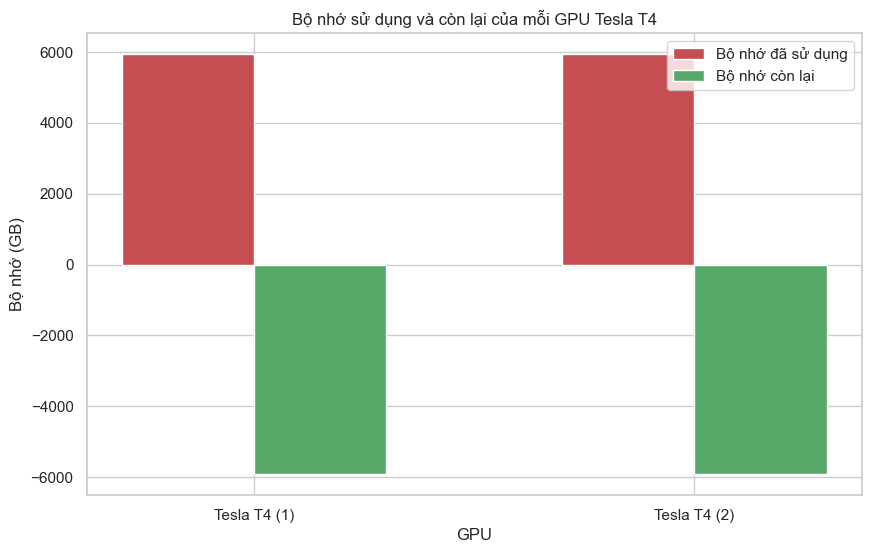

In [24]:

# 1. Biểu đồ phân phối bộ nhớ (tổng và đã sử dụng)
plt.figure(figsize=(10, 6))
bar_width = 0.3
x = range(len(gpu_names))

plt.bar(x, memory_used_gb, width=bar_width, label='Bộ nhớ đã sử dụng', color='r', align='center')
plt.bar([p + bar_width for p in x], memory_free_gb, width=bar_width, label='Bộ nhớ còn lại', color='g', align='center')

plt.xlabel('GPU')
plt.ylabel('Bộ nhớ (GB)')
plt.title('Bộ nhớ sử dụng và còn lại của mỗi GPU Tesla T4')
plt.xticks([p + bar_width/2 for p in x], gpu_names)
plt.legend()
plt.show()

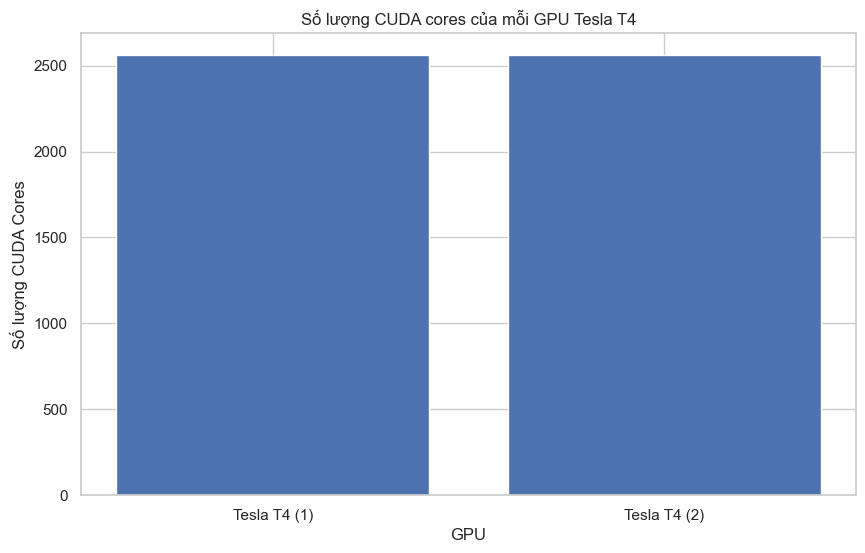

In [25]:
# 2. Biểu đồ số lượng CUDA cores của mỗi GPU
plt.figure(figsize=(10, 6))
plt.bar(gpu_names, cuda_cores, color='b')
plt.xlabel('GPU')
plt.ylabel('Số lượng CUDA Cores')
plt.title('Số lượng CUDA cores của mỗi GPU Tesla T4')
plt.show()
